# Introduction
## Rapid EDA
This file, along with others, is part of a series I'm calling Rapid EDA. These Rapid EDAs are 1 hour long exploratory data analyses where I take a dataset and do as much as I can within an hour.



In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('flavors_of_cacao.csv')
df.head()

,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Company 
(Maker-if known)         1795 non-null   object 
 1   Specific Bean Origin
or Bar Name  1795 non-null   object 
 2   REF                               1795 non-null   int64  
 3   Review
Date                       1795 non-null   int64  
 4   Cocoa
Percent                     1795 non-null   object 
 5   Company
Location                  1795 non-null   object 
 6   Rating                            1795 non-null   float64
 7   Bean
Type                         1794 non-null   object 
 8   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [ ]:
df.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

In [ ]:
#renaming all the columns to make it easier to work with
df.columns = ['company', 'specific_origin', 'REF', 'year', 'cocoa', 'location', 'rating', 'bean_type', 'broad_origin' ]

In [ ]:
df.head()

,company,specific_origin,REF,year,cocoa,location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [ ]:
df['cocoa'] = df['cocoa'].apply(lambda x: x[:-1])
df['cocoa'] = df['cocoa'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          1795 non-null   object 
 1   specific_origin  1795 non-null   object 
 2   REF              1795 non-null   int64  
 3   year             1795 non-null   int64  
 4   cocoa            1795 non-null   float64
 5   location         1795 non-null   object 
 6   rating           1795 non-null   float64
 7   bean_type        1794 non-null   object 
 8   broad_origin     1794 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 126.3+ KB


In [ ]:
df['cocoa'].describe()

count    1795.000000
mean       71.698329
std         6.323118
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       100.000000
Name: cocoa, dtype: float64

In [ ]:
# Question 1: does the amount of cocoa impact the rating?

In [ ]:
MASK90_100 = (df['cocoa'] > 90) & (df['cocoa'] <= 100)
MASK80_90 = (df['cocoa'] > 80) & (df['cocoa'] <= 90)
MASK70_80 = (df['cocoa'] > 70) & (df['cocoa'] <= 80)
MASK60_70 = (df['cocoa'] > 60) & (df['cocoa'] <= 70)
MASK50_60 = (df['cocoa'] > 50) & (df['cocoa'] <= 60)
MASK40_50 = (df['cocoa'] > 40) & (df['cocoa'] <= 50)

In [ ]:
cocoa90_100 = df[MASK90_100]['rating']
cocoa80_90 = df[MASK80_90]['rating']
cocoa70_80 = df[MASK70_80]['rating']
cocoa60_70 = df[MASK60_70]['rating']
cocoa50_60 = df[MASK50_60]['rating']
cocoa40_50 = df[MASK40_50]['rating']

In [ ]:
alpha = 0.05

In [ ]:
_, p_value = stats.f_oneway(cocoa90_100, cocoa80_90, cocoa70_80, cocoa60_70, cocoa50_60, cocoa40_50)
print(p_value)

7.319409116388628e-32


In [ ]:
# creating a function to test the p value with an alpha of 0.01
def test_p(p_value = p_value, alpha=0.01):
    if p_value < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')

In [ ]:
def test_f_oneway(p=p_value, alpha=0.01):
  conclusion = 'significant' if p < alpha else 'not significant'
  print(f'''The difference between the different groups was {conclusion} for a significance level of {alpha}.''')

In [ ]:
test_f_oneway()

The difference between the different groups was significant for a significance level of 0.01.


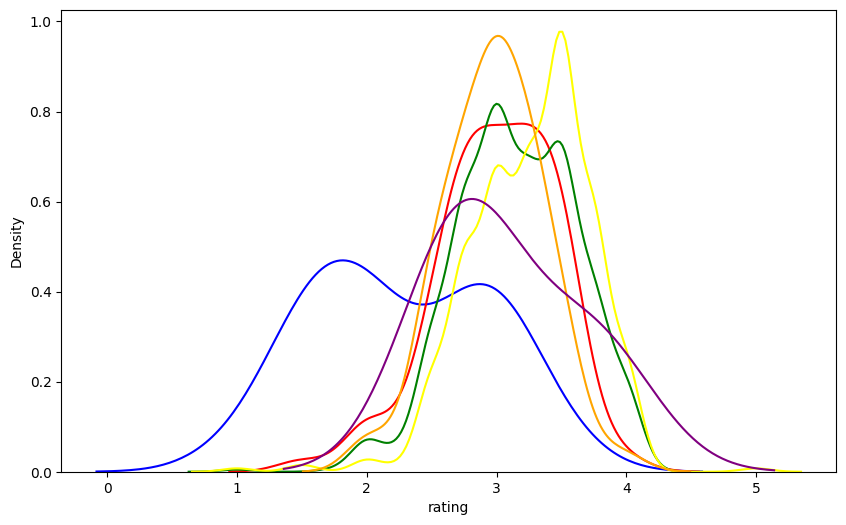

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(cocoa90_100, label=(f'{cocoa90_100}'), color='blue')
sns.kdeplot(cocoa80_90, label=(f'{cocoa80_90}'), color='red')
sns.kdeplot(cocoa70_80, label=(f'{cocoa70_80}'), color='green')
sns.kdeplot(cocoa60_70, label=(f'{cocoa60_70}'), color='yellow')
sns.kdeplot(cocoa50_60, label=(f'{cocoa50_60}'), color='orange')
sns.kdeplot(cocoa40_50, label=(f'{cocoa40_50}'), color='purple')
plt.show()

In [ ]:
# Does the year have an impact on the rating?

In [ ]:
df['year'].value_counts()

year
2015    285
2014    247
2016    219
2012    195
2013    184
2011    165
2009    123
2010    111
2008     93
2007     77
2006     72
2017     24
Name: count, dtype: int64

In [ ]:
MASK2006 = df['year'] == 2006
MASK2007 = df['year'] == 2007
MASK2008 = df['year'] == 2008
MASK2009 = df['year'] == 2009
MASK2010 = df['year'] == 2010
MASK2011 = df['year'] == 2011
MASK2012 = df['year'] == 2012
MASK2013 = df['year'] == 2013
MASK2014 = df['year'] == 2014
MASK2015 = df['year'] == 2015
MASK2016 = df['year'] == 2016
MASK2017 = df['year'] == 2017

In [ ]:
rating2006 = df[MASK2006]['rating']
rating2007 = df[MASK2007]['rating']
rating2008 = df[MASK2008]['rating']
rating2009 = df[MASK2009]['rating']
rating2010 = df[MASK2010]['rating']
rating2011 = df[MASK2011]['rating']
rating2012 = df[MASK2012]['rating']
rating2013 = df[MASK2013]['rating']
rating2014 = df[MASK2014]['rating']
rating2015 = df[MASK2015]['rating']
rating2016 = df[MASK2016]['rating']
rating2017 = df[MASK2017]['rating']
rating_by_year = [rating2006, rating2007, rating2008, rating2009, rating2010, rating2011, rating2012, rating2013, rating2014, rating2015, rating2016, rating2017]
color_list = ['blue', 'red', 'green', 'yellow', 'orange', 'purple', 'pink', 'black', 'gray', 'brown', 'cyan', 'magenta']

In [ ]:
_, p_value = stats.f_oneway(rating2006, rating2007, rating2008, rating2009, rating2010, rating2011, rating2012, rating2013, rating2014, rating2015, rating2016, rating2017)
print(p_value)

0.00020492752425445773


In [ ]:
test_f_oneway()

The difference between the different groups was significant for a significance level of 0.01.


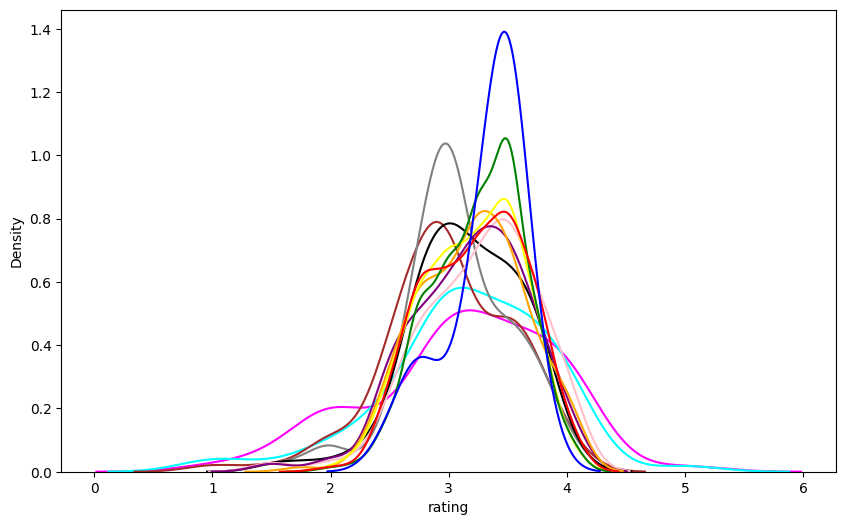

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
for x in rating_by_year:
    sns.kdeplot(x, label=(f'{x}'), color=color_list.pop())
plt.show()

In [ ]:
MASK_USA = df['location'] == 'U.S.A.'
MASK_NON = df['location'] != 'U.S.A.'

In [ ]:
USA_rating = df[MASK_USA]['rating']
NON_USA_rating = df[MASK_NON]['rating']

In [ ]:
_, p_value = stats.ttest_ind(USA_rating, NON_USA_rating)
print(p_value)

0.015192458426817025


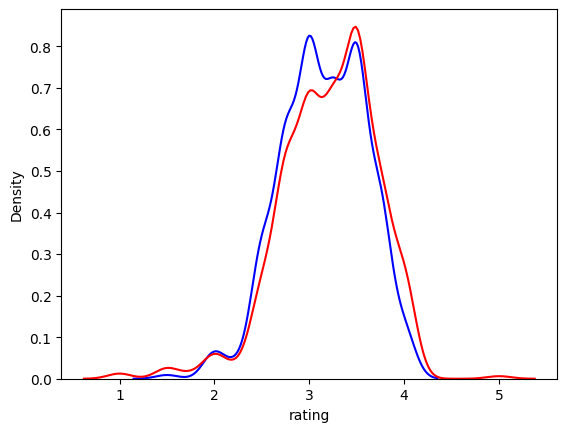

In [ ]:
sns.kdeplot(USA_rating, label=(f'{USA_rating}'), color='blue')
sns.kdeplot(NON_USA_rating, label=(f'{NON_USA_rating}'), color='red')
plt.show()

In [ ]:
test_p()

Reject the null hypothesis
